# ICT1508C Applied Statistics

*Descriptive Statistics Using Python*

>Filename:     &emsp;&emsp;`ICT1508C_Topic06-3_Py-Descriptive-Stats_Lesson_v2025-1.1.ipynb`<br>
>Version:      &emsp;&emsp;&ensp; `2025-1.1`<br>
>Description:  &ensp;&ensp;Jupyter notebook for ICT1508C lesson on Descriptive Statistics Using Python.<br>
>Module:       &emsp;&emsp;&ensp;ICT1508C<br>
>Type:         &emsp;&emsp;&emsp;&ensp; Lesson<br>
>Prepared by:  &ensp;Nicholas H L Wong<br>
>Organisation: &nbsp;Singapore Institute of Technology<br>
>Division:     &emsp;&emsp;&ensp;Infocomm Technology<br>
>Attribution:  &emsp;Copyright &copy; 2025 Nicholas H L Wong – All Rights Reserved<br>
>Reference:    &emsp;&ensp;Partially referenced from https://www.pythonfordatascience.org/descriptive-statistics-python/

## Setup

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# Read in dataset
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv") 

In [2]:
df.info()       # Display information about the dataset, including columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [3]:
df.head()       # View the first few rows

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [4]:
df.describe()   # Get some descriptive statistics

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


## Variable Types

#### Q: Classify the following variables as either continuous or categorical.
`sex`, `agegrp`, `bp_before`

`sex`: categorical<br>
`agegrp`: categorical<br>
`bp_before`: continuous

## Histograms

#### Q: Plot histograms of before and after blood pressure of males in the 60+ years old age group in the sample.

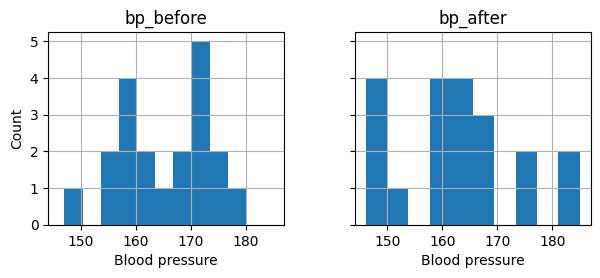

In [5]:
histarr = df[(df['sex']=='Male') &
             (df['agegrp']=="60+")].hist(column=['bp_before', 'bp_after'], 
                                         grid=True, sharex=True, sharey=True, 
                                         figsize=(7, 2.5))

# Cycle through each axis and add axis labels
# Ref.: https://stackoverflow.com/questions/42832675/setting-axis-labels-for-histogram-pandas
for ax in histarr.flatten():
    ax.set_xlabel("Blood pressure")
    ax.set_ylabel("Count")

array([[<Axes: title={'center': 'bp_before'}>,
        <Axes: title={'center': 'bp_after'}>]], dtype=object)

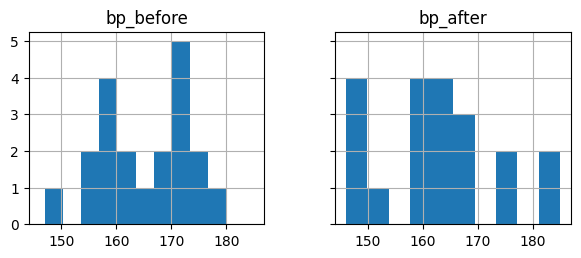

In [6]:
# We can also filter the dataframe itself and achieve the same result
df[(df['sex']=='Male') &
   (df['agegrp']=="60+")][['bp_before', 'bp_after']].hist(grid=True, sharex=True, 
                                                          sharey=True, figsize=(7, 2.5))

#### Q: Plot histograms of before and after blood pressure for both sexes and all age groups. For each sex/age group combination, the before and after blood pressure histograms should appear in the same plot. Use 8 bins for all plots. Display the legend.

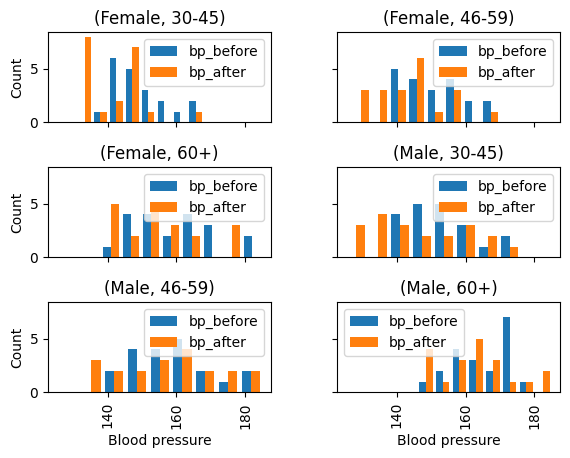

In [7]:
histarr = df.hist(column=['bp_before', 'bp_after'], by=['sex', 'agegrp'], 
                  grid=True, sharex=True, sharey=True, bins=8, legend=True)

for ax in histarr.flatten():
    ax.set_xlabel("Blood pressure")
    ax.set_ylabel("Count")

## Measures of Location

#### Q: What is the average male before blood pressure in the sample?

In [8]:
df[df['sex']=="Male"]['bp_before'].mean()

159.26666666666668

#### Q: What is the average before and after blood pressure for males in the 30–45 years old age group in the sample?

In [9]:
df[(df['sex']=="Male") &
   (df['agegrp']=="30-45")][['bp_before', 'bp_after']].mean()

bp_before    153.45
bp_after     146.45
dtype: float64

#### Q: What is the average after blood pressure for females older than 45 years old in the sample?

In [10]:
df[(df['sex']=="Female") &
   (df['agegrp']!="30-45")]['bp_after'].mean()

# Note that we are filtering the age group as a categorical variable.

149.7

#### Q: What are the mean, median, and mode of the after blood pressure for females in the 46–59 years old age group in the sample?

In [11]:
# Mean
df[(df['sex']=="Female") &
   (df['agegrp']=="46-59")]['bp_after'].mean()

144.3

In [12]:
# Median
df[(df['sex']=="Female") &
   (df['agegrp']=="46-59")]['bp_after'].median()

145.0

In [13]:
# Mode
df[(df['sex']=="Female") &
   (df['agegrp']=="46-59")]['bp_after'].mode()

0    132
1    137
2    145
3    146
4    157
Name: bp_after, dtype: int64

#### Q: Why are there multiple values reported for the mode in the previous question?
Because these are the most frequently occurring values, and they all appear an equal number of times (same frequency).

## Measures of Spread

#### Q: What is the standard deviation of before blood pressure for males in the 30–45 years old age group in the sample?

In [14]:
df[(df['sex']=="Male") &
   (df['agegrp']=="30-45")]['bp_before'].std()

9.95503046599795

#### Q: What are the variances of before and after blood pressure for females in the 30–45 years old age group in the sample?

In [15]:
df[(df['sex']=="Female") &
   (df['agegrp']=="30-45")][['bp_before', 'bp_after']].var()

bp_before    70.200000
bp_after     83.221053
dtype: float64

## Boxplots and Outliers

#### Q: Plot box-and-whisker plots of before and after blood pressure for females. Arrange one set of axes for `bp_before` and another set for `bp_after`. Within each set, group by `agegrp`.

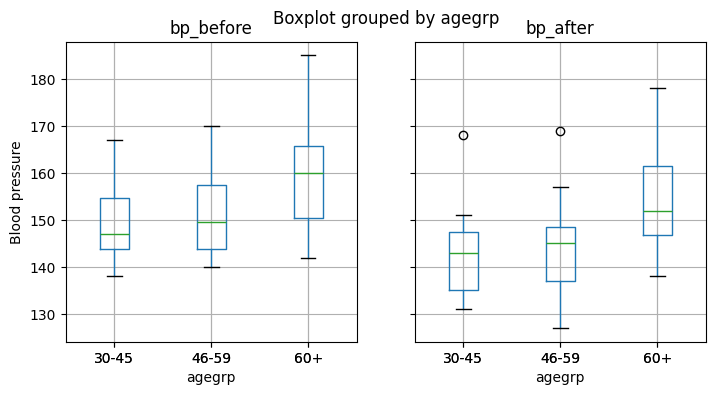

In [16]:
bparr = df[df['sex']=="Female"].boxplot(column=['bp_before', 'bp_after'], by="agegrp", figsize=(8,4))

for ax in bparr.flatten():
    ax.set_ylabel("Blood pressure")

*Note: Do NOT confuse the whiskers as indicating the limits for outliers. The whiskers are NOT the limits themselves. Rather, they indicate the lowest and highest OBSERVED data points above the lower in-range limit and below the upper in-range limit, respectively.*

#### Q: Suppose the following new data point is added as shown below. Would this data point be considered an outlier?
| sex | agegrp | bp_after |
| -: | -: | -: |
| Female | 60+ | 124 |

In [17]:
dp_new = 124    # New data point (store this for later)

In [18]:
# Calculate the Q1 (25%) and Q3 (75%) quartiles
quartiles = df[(df['sex']=="Female") &
               (df['agegrp']=="60+")]['bp_after'].quantile([0.25, 0.75])
quartiles

0.25    146.75
0.75    161.50
Name: bp_after, dtype: float64

In [19]:
# Calculate the interquartile range (IQR).
# Note that np.item() converts the single value from a Numpy array to a scalar.
IQR = np.diff(quartiles).item()
IQR

14.75

In [20]:
# Find the lower limit for in-range
llimit = quartiles.to_numpy()[0] - 1.5*IQR
llimit

124.625

In [21]:
# Fine the upper limit for in-range
ulimit = quartiles.to_numpy()[1] + 1.5*IQR
ulimit

183.625

In [22]:
# Use logical test to check whether the new data point is out of range
np.logical_or(dp_new < llimit, dp_new > ulimit)

True

Since the `bp_after` of `124` of the new data point is less than the lower limit, we consider the point to be an outlier.

In [23]:
'''The following is a more compact, albeit less trivial, way to achieve the same thing.'''

# Form a dataframe by filtering on the desired attributes
df_filt = df[(df['sex']=="Female") &
             (df['agegrp']=="60+")]['bp_after']

# Calculate the Q1 (25%) and Q3 (75%) quartiles
quartiles = df_filt.quantile([0.25, 0.75]).to_numpy()

# Construct an array containing the lower and upper limits for what is considered in-range
range_in = quartiles + np.array([-1.0, 1.0])*1.5*np.diff(quartiles).item()

# Use logical test to check whether the new data point is out of range
np.logical_or(dp_new < range_in[0], dp_new > range_in[1])

True

## Coefficient of Variation

#### Q: Compare the coefficients of variation of the after blood pressure of females and males in the 46–59 years old age group in the sample.

In [24]:
# Create filtered dataframes
df_f = df[(df['sex']=="Female") & (df['agegrp']=="46-59")]['bp_after']
df_m = df[(df['sex']=="Male") & (df['agegrp']=="46-59")]['bp_after']

# Calculate coefficients of variation (expressed in %)
coev_f = df_f.std() / df_f.mean() * 100
coev_m = df_m.std() / df_m.mean() * 100

# Print the results
print(coev_f, coev_m)

6.974000490517483 9.8967831825231


#### Q: Based on the calculated coefficients of variation, which sex's data in the abovementioned sets has more dispersion?

Male

*Note: We can only say this for `bp_after` measurements for the `46-59` age group. We would need to perform similar calculations for other groups or data to draw descriptive statistics about those.*

## Summary

In this lesson, we covered how to compute various descriptive statistical measures including
- Mean, median, and mode
- Standard deviation and variance
- Coefficient of variation

We also went over how to generate various visualisations including
- Histograms
- Box-and-whisker plots